In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import time
from keras.utils import np_utils

In [2]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [4]:
# one-hot format
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [5]:
# [0-255] to [0-1]
x_train = x_train / 255.0
x_test = x_test / 255.0

In [6]:
# define model
# 3-layer-NN (512 nodes, 512 nodes, 10 nodes - 2 hidden layers, output layer)
# L2 regulation to prevent overfitting(reduce variance)
# relu activation function for hidden layers & softmax for output layer

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # (60000, 758)
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [7]:
# define optimizer, loss function, metrics

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    # Adam = grad descent w momentum + RMSprop

#     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    # use this loss function when 2 or more integer label classes
    # logit = logistic + probit(확률을 재는 단위, = odds(두 확률의 비율)); 값이 0보다 큰지 아닌지, sigmoid의 역함수
    # 라벨값이 0 ~ 9로 되어있기 떄문에 사실은 One Hot Encoding을 해야 하는데,
    # sparse categorical crossentropy 를 사용하면 같은 효과 나와서 따로 하지 않음

    loss='categorical_crossentropy',
#     cross-entropy: a measure of how different your predicted distribution is from the target distribution

    metrics=['accuracy']
)

In [8]:
start = time.time()

In [9]:
# train
model_fit = model.fit(x_train, y_train,
    batch_size=128, epochs=4, verbose=1,
    # verbose : 0 silent, 1 progress bar, 2 one line per epoch
    validation_data=(x_test, y_test)
)
# epsilon = None (1e-07)

Epoch 1/4
469/469 [==============================] - 3s 5ms/step - loss: 0.3058 - accuracy: 0.9356 - val_loss: 0.1768 - val_accuracy: 0.9711
Epoch 2/4
469/469 [==============================] - 2s 5ms/step - loss: 0.1632 - accuracy: 0.9742 - val_loss: 0.1588 - val_accuracy: 0.9731
Epoch 3/4
469/469 [==============================] - 2s 5ms/step - loss: 0.1317 - accuracy: 0.9812 - val_loss: 0.1461 - val_accuracy: 0.9757
Epoch 4/4
469/469 [==============================] - 2s 5ms/step - loss: 0.1130 - accuracy: 0.9850 - val_loss: 0.1318 - val_accuracy: 0.9776


In [10]:
print('training time: ', time.time() - start)

training time:  9.870877504348755


train loss:  0.11299141496419907
train accuracy:  0.9850333333015442


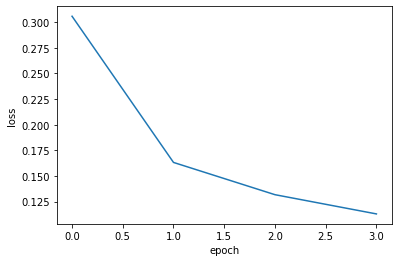

In [11]:
train_loss = model_fit.history['loss'][-1]
train_acc = model_fit.history['accuracy'][-1]

print('train loss: ', train_loss)
print('train accuracy: ', train_acc)

plt.plot(model_fit.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [12]:
# evaluate
test_loss, test_acc = model.evaluate(x_test, y_test)

print('test loss: ', test_loss)
print('test accuracy: ', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.1318 - accuracy: 0.9776
test loss:  0.1318446844816208
test accuracy:  0.9775999784469604
